# Machine Learning: Decision Trees

In [64]:
import numpy as np  # linear algebra
import pandas as pd  # data processing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree

In [42]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/drug200.csv"
)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [43]:
df.shape

(200, 6)

## Data Cleaning

In [44]:
# Impute/remove null values
null_counts = df.isnull().sum()
print("Null Value Counts:\n", null_counts)

Null Value Counts:
 Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


Since there are no null values, we don't need to perform any imputation or removal of null values in this case. Our dataset seems to be clean and ready for analysis as is.

In [45]:
# Remove duplicate rows
df_cleaned = df.drop_duplicates()
print("Shape of cleaned DataFrame:", df_cleaned.shape)

Shape of cleaned DataFrame: (200, 6)


Our dataset didn't contain any duplicate rows to begin with. 

### EDA

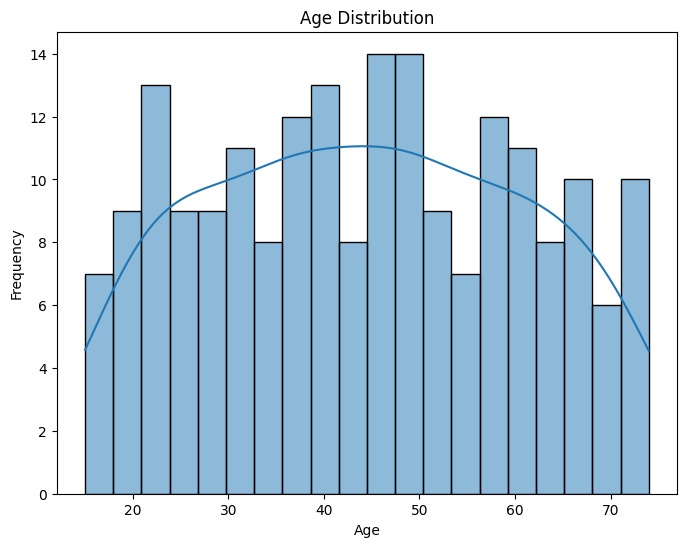

In [46]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="Age", bins=20, kde=True)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")
plt.show()

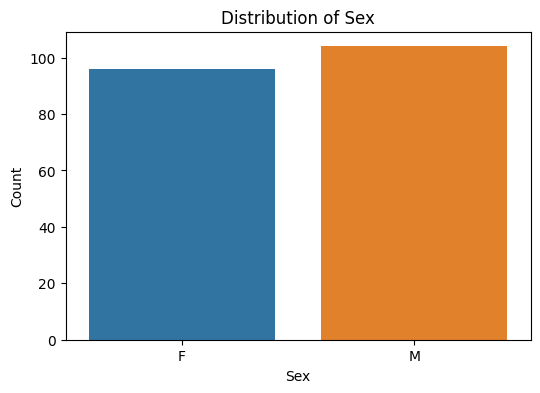

In [47]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Distribution of Sex")
plt.show()

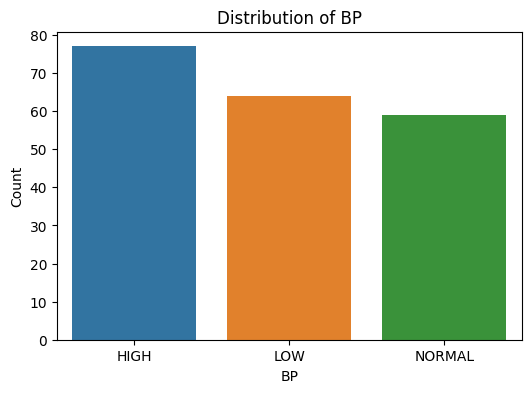

In [48]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="BP")
plt.xlabel("BP")
plt.ylabel("Count")
plt.title("Distribution of BP")
plt.show()

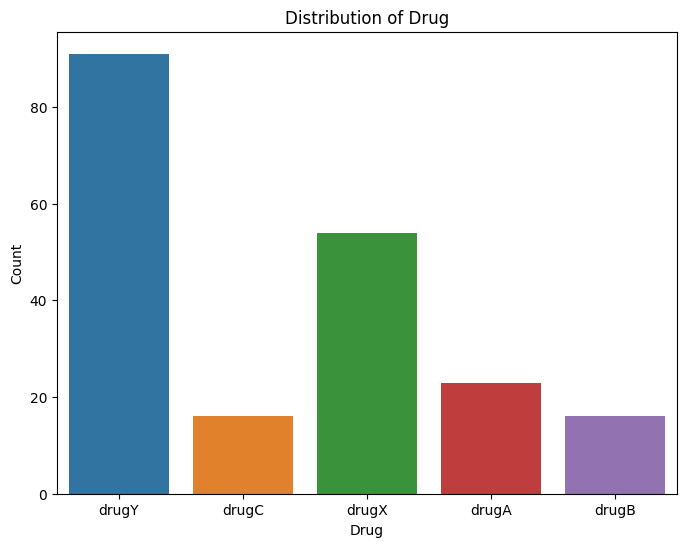

In [49]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Drug")
plt.xlabel("Drug")
plt.ylabel("Count")
plt.title("Distribution of Drug")
plt.show()

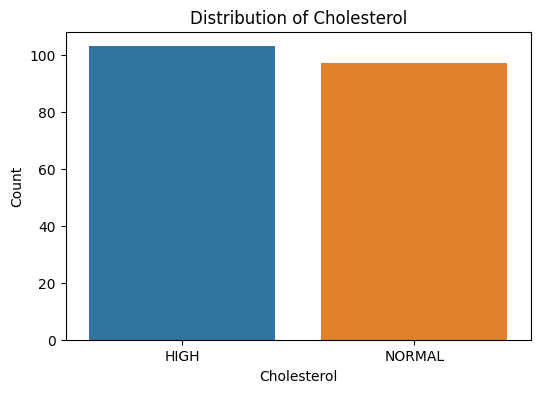

In [50]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Cholesterol")
plt.xlabel("Cholesterol")
plt.ylabel("Count")
plt.title("Distribution of Cholesterol")
plt.show()

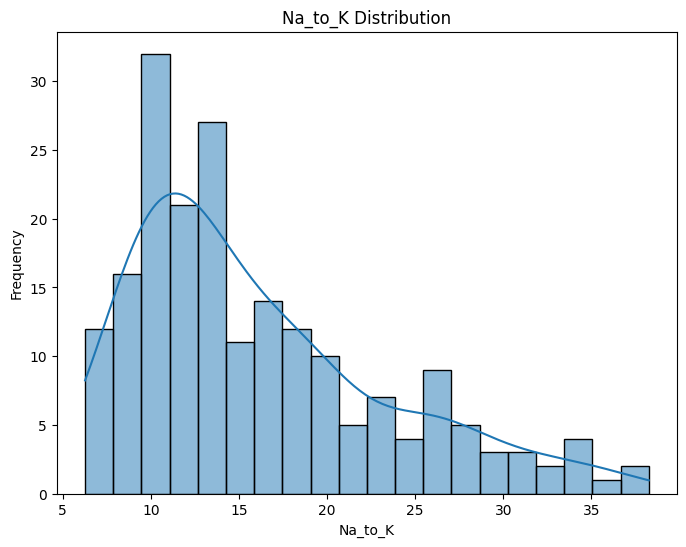

In [51]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="Na_to_K", bins=20, kde=True)
plt.xlabel("Na_to_K")
plt.ylabel("Frequency")
plt.title("Na_to_K Distribution")
plt.show()

### Encoding

In [52]:
# Convert categorical variables into numerical

label_encoder = LabelEncoder()

# 'Sex' to numerical using label encoding
df["Sex_encoded"] = label_encoder.fit_transform(df["Sex"])

# 'BP' to numerical using one-hot encoding
bp_encoded = pd.get_dummies(df["BP"], prefix="BP", drop_first=True)
df = pd.concat([df, bp_encoded], axis=1)

# 'Cholesterol' to numerical using one-hot encoding
cholesterol_encoded = pd.get_dummies(
    df["Cholesterol"], prefix="Cholesterol", drop_first=True
)
df = pd.concat([df, cholesterol_encoded], axis=1)

# 'Drug' to numerical using label encoding
df["Drug_encoded"] = label_encoder.fit_transform(df["Drug"])

# We drop the original categorical columns:
df_cleaned = df.drop(["Sex", "BP", "Cholesterol", "Drug"], axis=1)

# Then, we convert boolean columns to numerical (0 or 1):
boolean_columns = ["BP_LOW", "BP_NORMAL", "Cholesterol_NORMAL"]
df_cleaned[boolean_columns] = df_cleaned[boolean_columns].astype(int)

# Finally, we display the cleaned dataframe:
df_cleaned.head()

,Age,Na_to_K,Sex_encoded,BP_LOW,BP_NORMAL,Cholesterol_NORMAL,Drug_encoded
0,23,25.355,0,0,0,0,4
1,47,13.093,1,1,0,0,2
2,47,10.114,1,1,0,0,2
3,28,7.798,0,0,1,0,3
4,61,18.043,0,1,0,0,4


### Splitting

In [53]:
# Split the dataset into training and testing

# First, we separate the features (X) and target (y):
X = df_cleaned.drop("Drug_encoded", axis=1)
y = df_cleaned["Drug_encoded"]

# Then, we split the dataset into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Finding best max depth value

In [54]:
# Iterate overt different max depth values to get the best Decision tree model using different metrics

# Iterate over different max depth values
max_depth_values = [None, 1, 2, 3, 4, 5, 6]
metrics = ["accuracy", "precision", "recall", "f1"]

for max_depth in max_depth_values:
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Max Depth: {max_depth}")
    for metric in metrics:
        if metric == "accuracy":
            score = accuracy_score(y_test, y_pred)
        elif metric == "precision":
            score = precision_score(y_test, y_pred, average="weighted")
        elif metric == "recall":
            score = recall_score(y_test, y_pred, average="weighted")
        elif metric == "f1":
            score = f1_score(y_test, y_pred, average="weighted")
        print(f"{metric.capitalize()}: {score:.4f}")
    print("=" * 30)

Max Depth: None
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1: 1.0000
Max Depth: 1
Accuracy: 0.6500
Precision: 0.4960
Recall: 0.6500
F1: 0.5431
Max Depth: 2
Accuracy: 0.6500
Precision: 0.6950
Recall: 0.6500
F1: 0.6161
Max Depth: 3
Accuracy: 0.8000
Precision: 0.6641
Recall: 0.8000
F1: 0.7191
Max Depth: 4
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1: 1.0000
Max Depth: 5
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1: 1.0000
Max Depth: 6
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1: 1.0000


d:\AnyoneAI\environment\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\AnyoneAI\environment\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\AnyoneAI\environment\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
# Get predictions over testing dataset using the best model

# According to the previous results, the best 'max_depth' for our Decision Tree model is (after this, the model overfits):
best_max_depth = 3

# Create and train the Decision Tree model with the chosen max depth
final_model = DecisionTreeClassifier(max_depth=best_max_depth, random_state=42)
final_model.fit(X_train, y_train)

# Get predictions on the testing dataset
y_pred = final_model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the testing dataset: {accuracy:.4f}")

Accuracy on the testing dataset: 0.8000


## Feature Importance

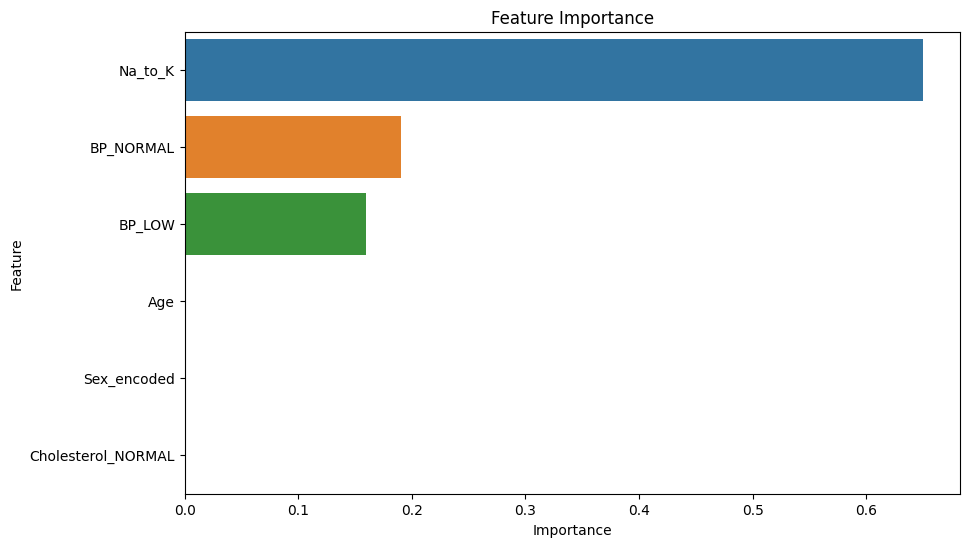

In [62]:
# Plot feature importance

# We train a Decision Tree model with the chosen max depth:
final_model = DecisionTreeClassifier(max_depth=best_max_depth, random_state=42)
final_model.fit(X_train, y_train)

# We get the feature importances:
feature_importances = final_model.feature_importances_

# We create a dataframe to hold feature names and their corresponding importances:
feature_importance_df = pd.DataFrame(
    {"Feature": X.columns, "Importance": feature_importances}
)

# We sort them by importance in descending order:
feature_importance_df = feature_importance_df.sort_values(
    by="Importance", ascending=False
)

# And finally, we create a bar plot of feature importances:
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x="Importance", y="Feature")
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

## Plot the decision tree

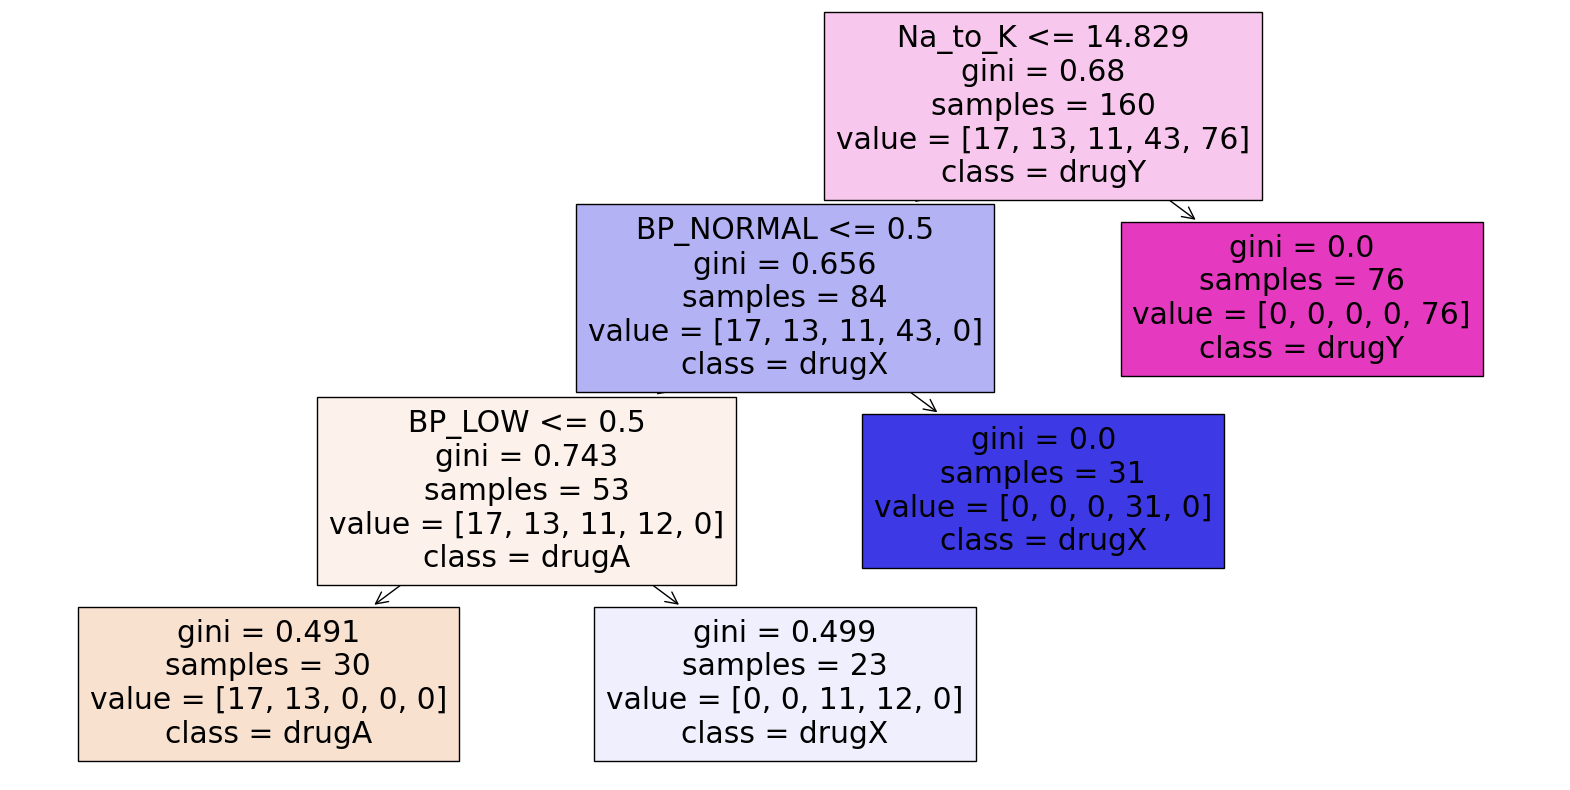

In [65]:
# Plot the decision tree

# We use the 'plot_tree' function to create a visual representation of the Decision Tree:
plt.figure(figsize=(20, 10))
plot_tree(
    final_model,
    feature_names=X.columns,
    class_names=label_encoder.classes_,
    filled=True,
)
plt.show()

## Evaluation Metric

In [66]:
# Evaluate different metrics over testing using the best model

# We calculate and print evaluation metrics:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.8000
Precision: 0.6641
Recall: 0.8000
F1-Score: 0.7191


d:\AnyoneAI\environment\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
